# CUSTOMER SEGMENTATION PROJECT

**WELCOME TO A NEW PROJECT NOTEBOOK!**

In this project, you will see solutions to customer segmentation via ***Cluster Analysis*** with an ***Unsupervised Learning*** approach.

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

We first begin with a quick ***Exploratory Data Analysis***, then check the distribution of customers according to different variables, and then discover relationships between variables. Finally, we will spesify the different variables to use for cluster analysis using ***K-Means Clustering*** method. 

***NOTE:*** 
* This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.

Let's get started!

**In this notebook, we will fulfill the following tasks:**

1. Import Libraries, Load Dataset, Exploring Data
  - Import Libraries
  - Load Dataset
  - Explore Data
2. Exploratory Data Analysis (EDA)
3. Cluster Analysis
   - Clustering based on Age and Spending Score
     - *i. Create a new dataset with two variables of your choice*
     - *ii. Determine optimal number of clusters*
     - *iii. Apply K Means*
     - *iv. Visualizing and Labeling All the Clusters*   
   - Clustering based on Annual Income and Spending Score
     - *i. Create a new dataset with two variables of your choice*
     - *ii. Determine optimal number of clusters*
     - *iii. Apply K Means*
     - *iv. Visualizing and Labeling All the Clusters*
   - Hierarchical Clustering
     - *i. Determine optimal number of clusters using Dendogram*
     - *ii. Apply Agglomerative Clustering*
     - *iii. Visualizing and Labeling All the Clusters* 
   - Conclusion

---
---

# 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

## Import Libraries

In [482]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# !pip install skimpy
from skimpy import clean_columns
import scipy.stats as stats
from scipy.stats import skew, kurtosis

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Environment settings: 
# pd.set_option('display.float_format', lambda x: f'{x:.3f}')
# pd.set_option('display.float_format', lambda x: '%.4f'%x)
# pd.options.display.float_format = '{:.4f}'.format
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 100)

In [483]:
# The style parameters control properties like the color of the background and whether a grid is enabled by default.
# sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("whitegrid")

params = {
'figure.figsize':(12,6),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'r',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.style.library)
# print(plt.rcParams['figure.figsize'])

In [484]:
random_state=42


## Load Dataset

In [485]:
df = pd.read_csv('./Mall_Customers.csv', index_col='CustomerID')
df2 = df.copy()
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


## rename columns

You can rename columns to more usable, if you need.

In [486]:
df = (clean_columns(df));
df

4 column names have been cleaned

,gender,age,annual_income_k_$,spending_score_1_100
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [487]:
df.columns

Index(['gender', 'age', 'annual_income_k_$', 'spending_score_1_100'], dtype='object')

In [488]:
df.columns = ['gender', 'age', 'annual_income', 'spending_score']

In [489]:
df.columns

Index(['gender', 'age', 'annual_income', 'spending_score'], dtype='object')

In [490]:
df.head()

,gender,age,annual_income,spending_score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [492]:
df.duplicated().sum()

0

In [493]:
df.isna().sum().sum()

0

In [494]:
df.describe(include='object').T

,count,unique,top,freq
gender,200,2,Female,112


---
---

# 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [495]:
df.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


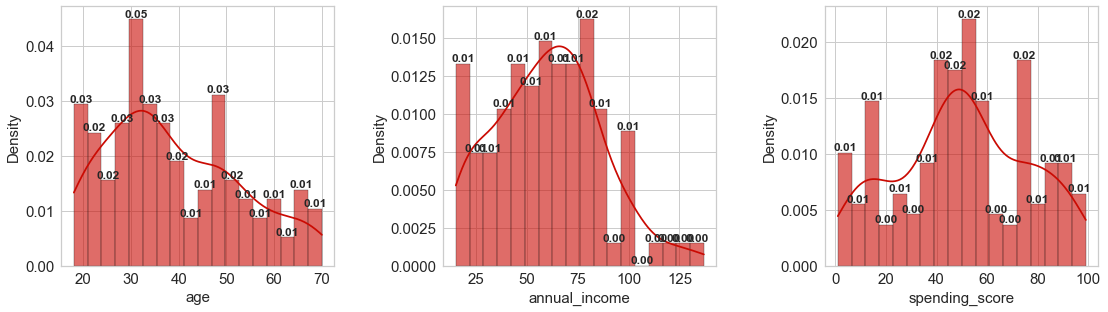

In [496]:
fig = plt.figure(figsize=(18, 2))
plt.subplots_adjust(
    left=0.1, right=0.9,
    top=1.9, bottom=0.1,
    wspace=0.4, hspace=0.25
)
for i, col in enumerate(numeric):
    ax = plt.subplot(int(np.ceil(len(numeric)/3)), 3, i+1)
    sns.histplot(x=col, data=df, 
        kde=True, stat='density',
        color='r', edgecolor = 'k',
        bins=int(90/5), alpha=.6,
        ax=ax
    )
    ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=12, weight='bold')
plt.show();

In [497]:
objects = df.select_dtypes('O').columns
numeric = df.select_dtypes('number').columns

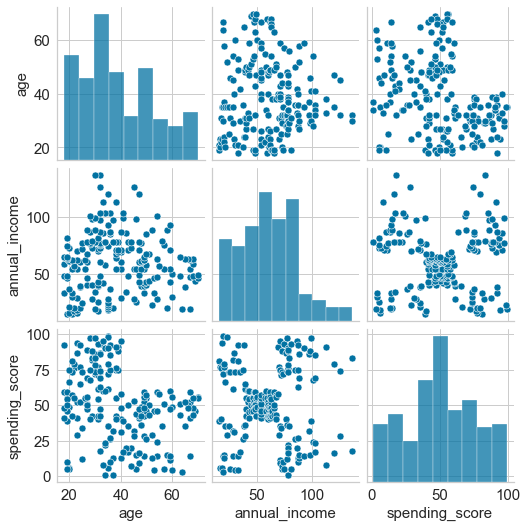

In [498]:
sns.pairplot(df)
plt.show()

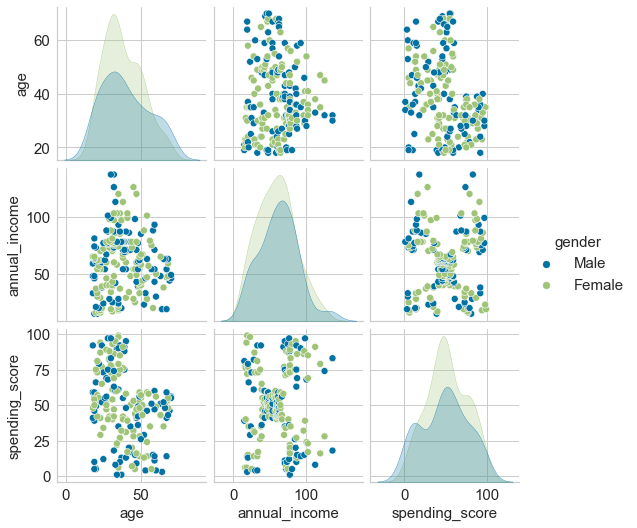

In [499]:
sns.pairplot(df, hue="gender")
plt.show()

**Skewness and Kurtosis**

In [500]:
pd.concat([df.skew(axis=0, skipna=True), 
           df.kurtosis(axis=0, skipna=True)], 
          axis=1, 
          keys=['skew', 'kurtosis'])

,skew,kurtosis
age,0.485569,-0.671573
annual_income,0.321843,-0.098487
spending_score,-0.047220,-0.826629


**Multicollinenarity**


In [501]:
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

False

**Correlation:**

In [502]:
import scipy 

print("Correlation Matrix \n* means p=0.05, ** means p=0.01, **** means p=0.001 ")

correlation = df.corr()
p_value = df.corr(method=lambda x, y: scipy.stats.pearsonr(x, y)[1]) - np.eye(*correlation.shape)
p = p_value.applymap(lambda x: ''.join(['*' for t in [0.05, 0.01, 0.001] if x<=t]))
correlation.round(2).astype(str) + p

Correlation Matrix 
* means p=0.05, ** means p=0.01, **** means p=0.001 


,age,annual_income,spending_score
age,1.0***,-0.01,-0.33***
annual_income,-0.01,1.0***,0.01
spending_score,-0.33***,0.01,1.0***


Age and spending scores are highly correlated!

In [503]:
df.groupby("gender").corr()

age  annual_income  spending_score
gender                                                        
Female age             1.000000       0.059912       -0.375439
       annual_income   0.059912       1.000000        0.047542
       spending_score -0.375439       0.047542        1.000000
Male   age             1.000000      -0.092978       -0.279628
       annual_income  -0.092978       1.000000       -0.023684
       spending_score -0.279628      -0.023684        1.000000

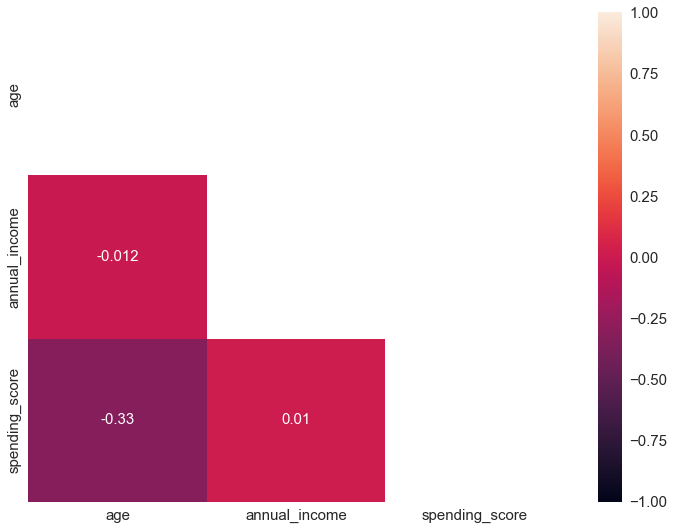

In [504]:
plt.figure(figsize=(12, 9))
sns.heatmap(
    df.corr().round(3), 
    mask=np.triu(np.ones_like(df.corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1
)
plt.show();

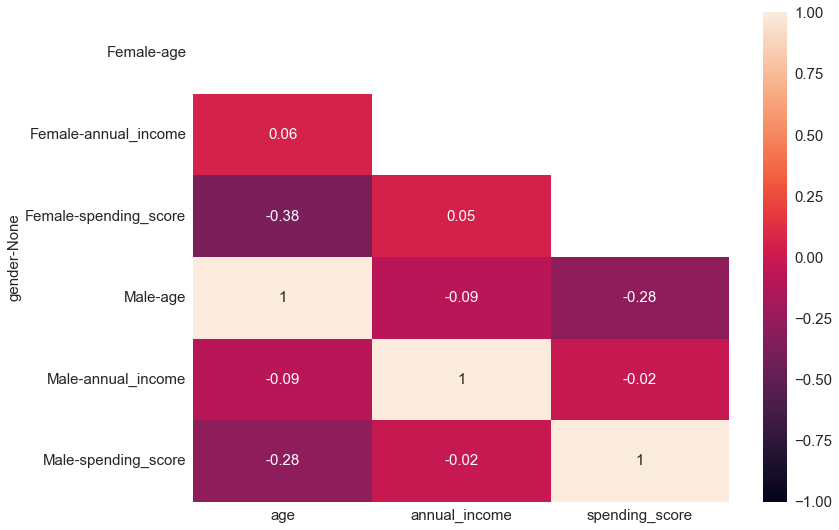

In [505]:
plt.figure(figsize=(12, 9))

sns.heatmap(
    df.groupby('gender').corr().round(2), 
    mask=np.triu(np.ones_like(df.groupby('gender').corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1
)
plt.show();

<AxesSubplot:xlabel='gender', ylabel='spending_score'>

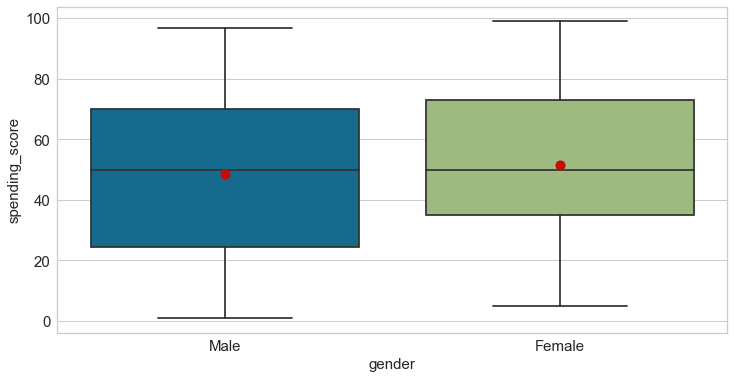

In [506]:
sns.boxplot(data=df, x="gender", y="spending_score")

<AxesSubplot:xlabel='gender', ylabel='annual_income'>

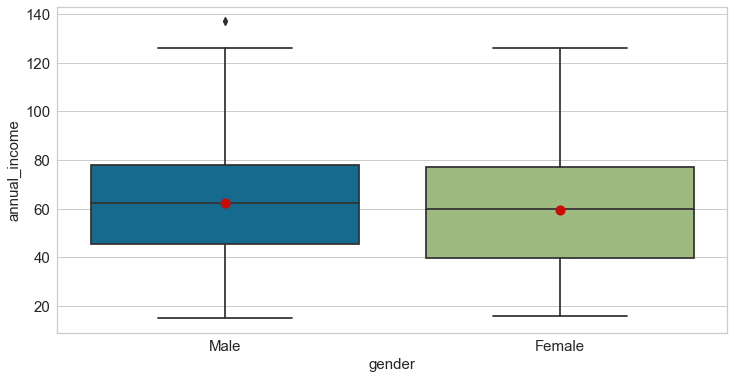

In [507]:
sns.boxplot(data=df, x="gender", y="annual_income")

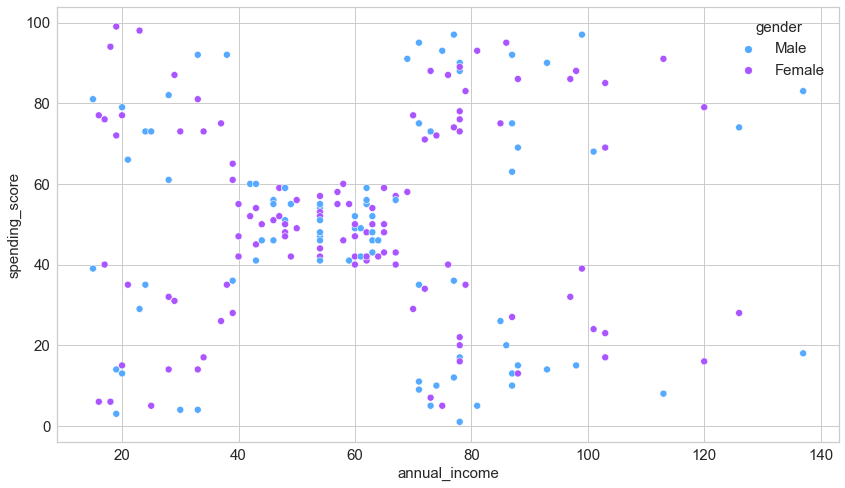

In [508]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x="annual_income", 
                y="spending_score", 
                data=df, 
                hue="gender", 
                palette="cool")
plt.show()

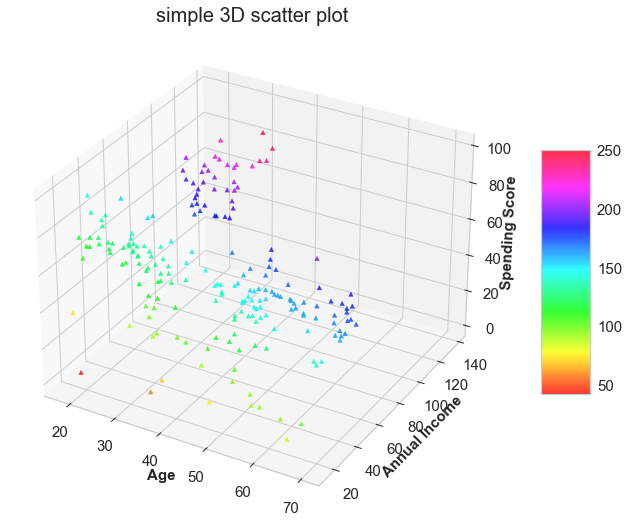

In [509]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(df.age, df.annual_income, df.spending_score,
                    alpha = 0.8,
                    c = (df.age + df.annual_income + df.spending_score),
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('Age', fontweight ='bold')
ax.set_ylabel('Annual Income', fontweight ='bold')
ax.set_zlabel('Spending Score', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()


# 3. KMeans Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

In [510]:
# !pip install -U scikit-learn

# MACHINE LEARNING
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

# SUPERVISED LEARNING
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
#from xgboost import XGBClassifier

# import sklearn sklearn.metrics.SCORERS.keys()
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

# UNSUPERVISED LEARNING
from sklearn.cluster import KMeans

# import sklearn sklearn.metrics.SCORERS.keys()
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

import pickle

In [511]:
# yellowbrick library for visualizing the model performance
from yellowbrick.cluster import KElbowVisualizer 

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

# !pip install scikit-plot
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

## Scaling the Data

In [512]:
df_not_scaled = df.copy()

In [513]:
# scaled df
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, normalize

scaler = StandardScaler()

numbers = df.select_dtypes(include='number').columns
df[numbers] = scaler.fit_transform(df[numbers])
df

,gender,age,annual_income,spending_score
CustomerID,,,,
1,Male,-1.424569,-1.738999,-0.434801
2,Male,-1.281035,-1.738999,1.195704
3,Female,-1.352802,-1.700830,-1.715913
4,Female,-1.137502,-1.700830,1.040418
5,Female,-0.563369,-1.662660,-0.395980
...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061
197,Female,0.441365,2.497807,-0.861839
198,Male,-0.491602,2.497807,0.923953


## Clustering based on Age and Spending Score
- *i. Create a new dataset with two variables of your choice*

In [514]:
X = df[["age", "spending_score"]]

In [515]:
X.shape

(200, 2)

In [516]:
X.head()

,age,spending_score
CustomerID,,
1,-1.424569,-0.434801
2,-1.281035,1.195704
3,-1.352802,-1.715913
4,-1.137502,1.040418
5,-0.563369,-0.395980


### Vanilla K_Means Clustering

In [517]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(
    n_clusters=2,
    random_state=random_state
)
kmeans_model.fit(X)
# kmeans_model.labels_
# kmeans_model.fit_predict(X)

KMeans(n_clusters=2, random_state=42)

In [518]:
X["clusters"] = kmeans_model.labels_
X["clusters"].value_counts().sort_index()

0    103
1     97
Name: clusters, dtype: int64

In [519]:
X

,age,spending_score,clusters
CustomerID,,,
1,-1.424569,-0.434801,1
2,-1.281035,1.195704,1
3,-1.352802,-1.715913,0
4,-1.137502,1.040418,1
5,-0.563369,-0.395980,1
...,...,...,...
196,-0.276302,1.118061,1
197,0.441365,-0.861839,0
198,-0.491602,0.923953,1


### Hopkins test

In [520]:
from pyclustertend import hopkins

X = X.drop("clusters", axis =1)

hopkins(X, X.shape[0]), hopkins(X, X.shape[0]//2)

(0.3233300046497245, 0.3265099656271467)

### *ii. Determine optimal number of clusters* - Elbow metod

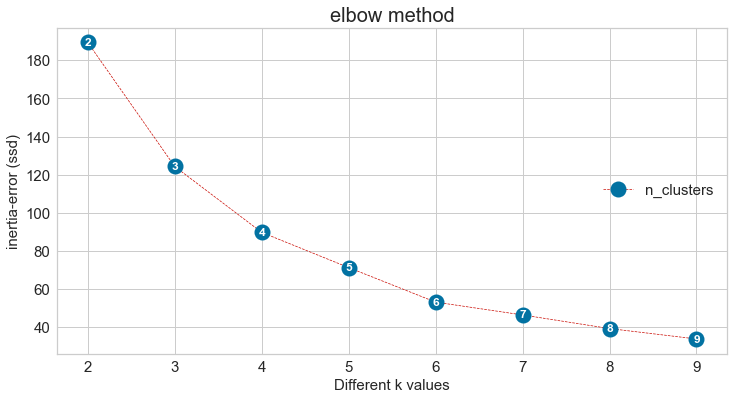

In [521]:
K = range(2,10)

# sum squared distance
ssd = [] 

for k in K:
    model = KMeans(
        n_clusters=k,
        random_state=random_state,
    )
    model.fit(X)
    # intertia: Distance from each sample to centroid of its cluster
    ssd.append(model.inertia_)
    
plt.plot(
    K, ssd, 
    color='r', ls='--', lw=0.7,
    marker='o', mfc='b', ms=16,
    label='n_clusters'
)
for x, y in zip(K, ssd):
    plt.annotate(x, (x, y), size=12, 
        weight='heavy', color='w',
        ha='center', va='center'
    ) 
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method") 
plt.legend(loc='center right')
plt.show();

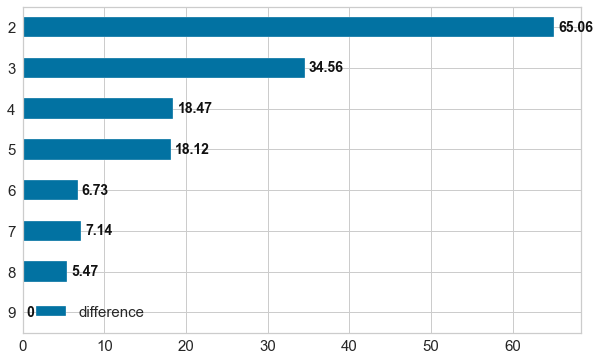

In [522]:
df_diff = pd.DataFrame(ssd, index=K, columns=['difference']).diff(-1)

g = df_diff.round(2).plot.barh(rot=0, figsize=(10,6))
g.bar_label(g.containers[0], fontsize=14, weight='bold', color='k', padding=4)
g.invert_yaxis()
plt.show()

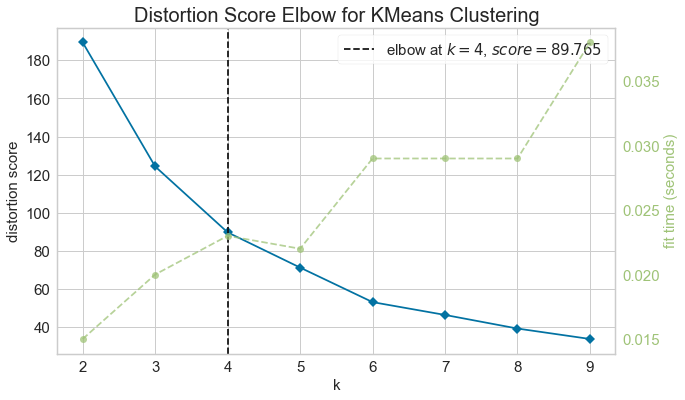

In [523]:
from yellowbrick.cluster import KElbowVisualizer
fig, ax = plt.subplots(figsize=(10,6))

model = KMeans(
    random_state=random_state,
)
visualizer = KElbowVisualizer(model, k=(2,10), ax=ax)
# Fits the data to the visualizer

visualizer.fit(X) 
visualizer.show();

# score: (default- distortion )(mean of sum squared distances to centers.)

### Silhouette score

For n_clusters=2, the silhouette score is 0.4721271643062346
For n_clusters=3, the silhouette score is 0.43952990002101927
For n_clusters=4, the silhouette score is 0.4383860846531993
For n_clusters=5, the silhouette score is 0.44754858878462783
For n_clusters=6, the silhouette score is 0.4531637132837109
For n_clusters=7, the silhouette score is 0.40053964470007974
For n_clusters=8, the silhouette score is 0.41387412992354433


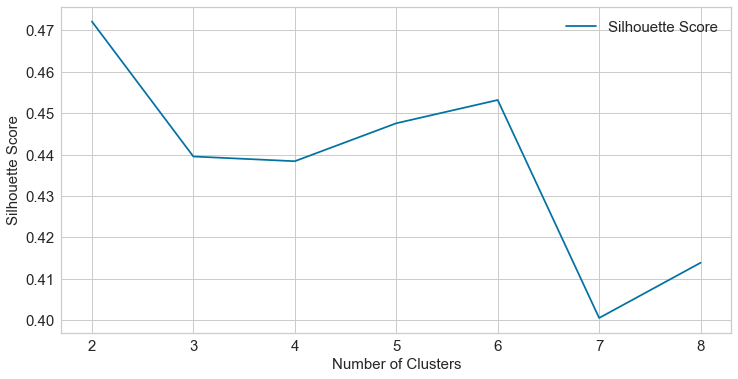

In [524]:
range_n_clusters = range(2,9)
sse = []

for num_clusters in range_n_clusters:
    
    #iterating through cluster sizes
    clusterer = KMeans(n_clusters = num_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    #Finding the average silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    sse.append(silhouette_avg)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
    
fig.add_subplot(122)
plt.plot(range_n_clusters, sse,'b-',label='Silhouette Score')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

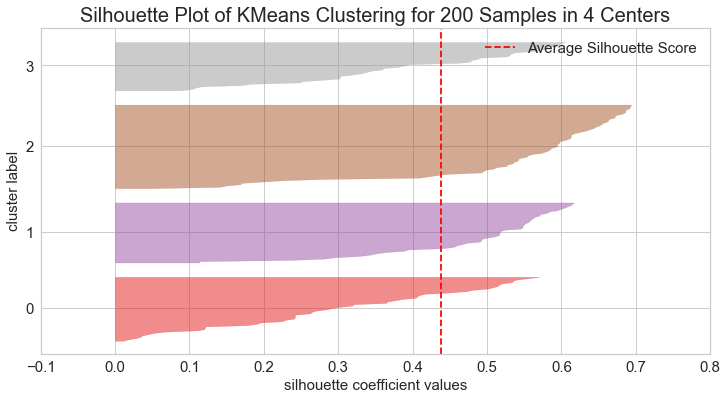

In [525]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(
    n_clusters=4,
    random_state=random_state,
)
visualizer = SilhouetteVisualizer(model)
# Fit the data to the visualizer
visualizer.fit(X)    
visualizer.poof();

### *iii. Apply K Means*: Building the model based on the optimal number of clusters

In [536]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_model.fit(X)


KMeans(n_clusters=4, random_state=42)

In [537]:
y_pred = kmeans.fit_predict(X)
y_pred

array([3, 0, 3, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 3, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 4, 0, 2, 0,
       1, 0, 2, 3, 3, 3, 2, 0, 3, 4, 2, 2, 2, 4, 3, 2, 4, 3, 4, 2, 4, 3,
       2, 4, 3, 3, 4, 2, 4, 4, 4, 3, 2, 3, 3, 2, 2, 3, 4, 2, 3, 2, 2, 3,
       0, 2, 4, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 4, 3, 2, 3, 4, 2, 4, 4,
       4, 3, 3, 3, 3, 3, 4, 2, 2, 2, 3, 3, 0, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       3, 0, 3, 0, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 2, 0, 3, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 3, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 3, 0, 1, 0, 3, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       3, 0])

### *iv. Visualizing and Labeling All the Clusters*

In [527]:
kmeans_model.labels_

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2])

In [539]:
kmeans.cluster_centers_

array([[-6.14157248e-01,  1.14971545e+00,  2.00000000e+00],
       [ 6.28336254e-01, -1.36651894e+00,  3.00000000e+00],
       [ 7.77130725e-01, -9.92722767e-02,  1.00000000e+00],
       [-8.34646601e-01, -3.94427057e-01,  1.11022302e-15],
       [ 1.89558491e+00, -1.59372723e-02,  1.00000000e+00]])

In [528]:
X["predicted_clusters"] = kmeans_model.labels_
X["predicted_clusters"].value_counts()

2    65
0    50
1    47
3    38
Name: predicted_clusters, dtype: int64

In [529]:
X

,age,spending_score,predicted_clusters
CustomerID,,,
1,-1.424569,-0.434801,0
2,-1.281035,1.195704,2
3,-1.352802,-1.715913,0
4,-1.137502,1.040418,2
5,-0.563369,-0.395980,0
...,...,...,...
196,-0.276302,1.118061,2
197,0.441365,-0.861839,3
198,-0.491602,0.923953,2


In [532]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

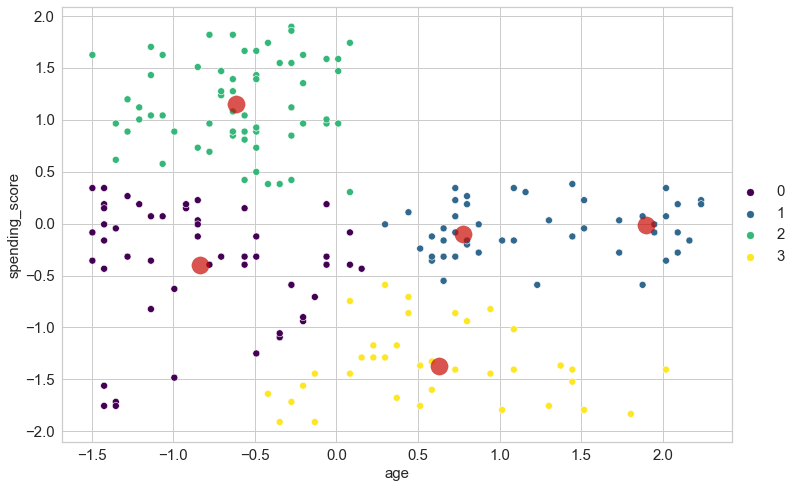

In [543]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=X["age"], y=X["spending_score"], hue= X["predicted_clusters"], palette= "viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=300, alpha=0.7)
plt.legend(loc="center right", bbox_to_anchor=(1.1,0.5))
plt.show()

### Visualization Centroids cluster_centers_

In [408]:
# scaled
centers = kmeans_model.cluster_centers_
pd.DataFrame(centers)

,0,1
0,-0.834647,-0.394427
1,1.229272,-0.065584
2,-0.614157,1.149715
3,0.628336,-1.366519


In [409]:
# centers of annual_income_k_$ feature
centers[:,0] 

array([-0.8346466 ,  1.22927178, -0.61415725,  0.62833625])

In [410]:
# centers of spending_score_1_100 feature
centers[:,1] 

array([-0.39442706, -0.06558366,  1.14971545, -1.36651894])

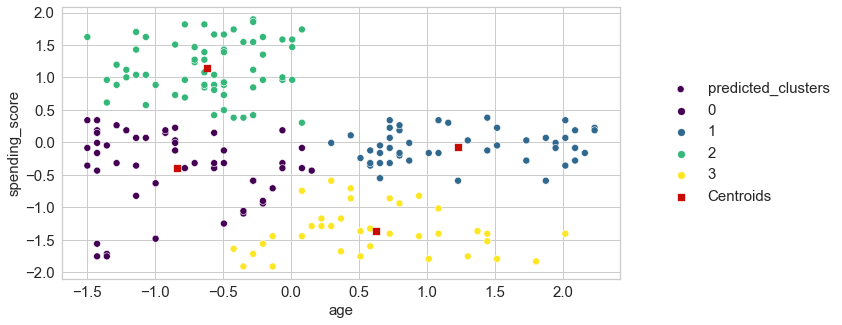

In [412]:
plt.figure(figsize=(10,5))

sns.scatterplot(
    x="age", y="spending_score", 
    data=X, 
    hue= "predicted_clusters", 
    palette= "viridis", 
    label='predicted_clusters'
)
plt.scatter(centers[:,0], centers[:,1], marker='s', c="r", label='Centroids')
plt.legend(loc="center right", bbox_to_anchor=(1.4, 0.5))
plt.show();

In [413]:
predicted_clusters_mean = X.groupby("predicted_clusters").mean().T
predicted_clusters_mean

predicted_clusters,0,1,2,3
age,-0.834647,1.229272,-0.614157,0.628336
spending_score,-0.394427,-0.065584,1.149715,-1.366519


## Clustering based on Annual Income and Spending Score
- *i. Create a new dataset with two variables of your choice*

In [551]:
X = df_not_scaled[['annual_income', 'spending_score']]

In [415]:
X.shape

(200, 2)

### Vanilla K_Means Clustering

In [552]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(
    n_clusters=2,
    random_state=random_state
)
kmeans_model.fit(X)
# kmeans_model.labels_
# kmeans_model.fit_predict(X)

KMeans(n_clusters=2, random_state=42)

### Hopkins test

In [417]:
from pyclustertend import hopkins

hopkins(X, X.shape[0]), hopkins(X, X.shape[0]//2)

(0.28790911930002244, 0.30648150669598356)

check hopkins values and detect is data  suitable for clustering.

### *ii. Determine optimal number of clusters*

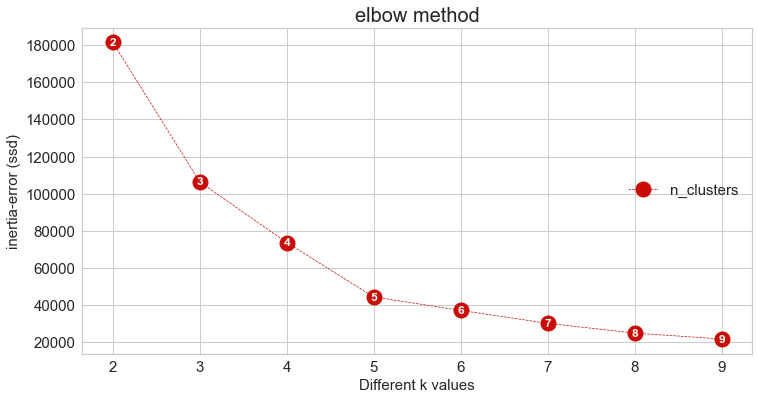

In [418]:
K = range(2,10)

# sum squared distance
ssd = [] 

for k in K:
    model = KMeans(
        n_clusters=k,
        random_state=random_state,
    )
    model.fit(X)
    # intertia: Distance from each sample to centroid of its cluster
    ssd.append(model.inertia_)
    
plt.plot(
    K, ssd, 
    color='r', ls='--', lw=0.7,
    marker='o', mfc='r', ms=16,
    label='n_clusters'
)
for x, y in zip(K, ssd):
    plt.annotate(x, (x, y), size=12, 
        weight='heavy', color='w',
        ha='center', va='center'
    ) 
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method") 
plt.legend(loc='center right')
plt.show();

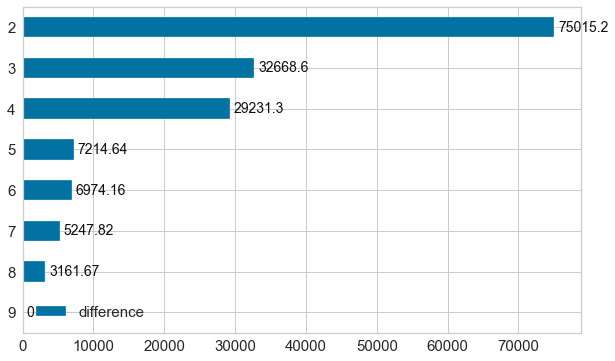

In [419]:
df_diff = pd.DataFrame(ssd, index=K, columns=['difference']).diff(-1)

g = df_diff.round(2).plot.barh(rot=0, figsize=(10,6))
g.bar_label(g.containers[0], fontsize=14, color='k', padding=4)
g.invert_yaxis()
plt.show()

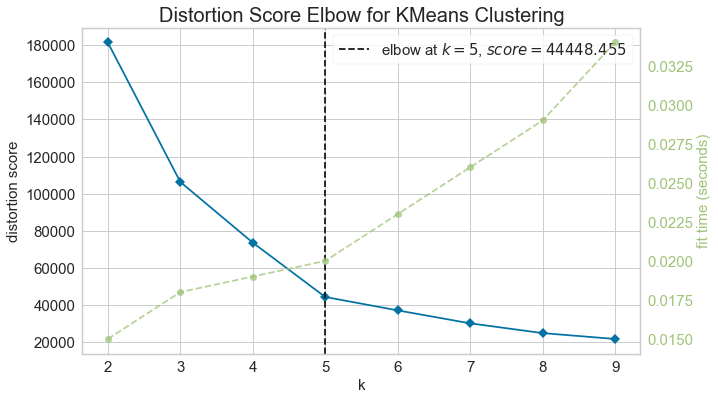

In [421]:
from yellowbrick.cluster import KElbowVisualizer
fig, ax = plt.subplots(figsize=(10,6))

model = KMeans(
    random_state=random_state,
)
visualizer = KElbowVisualizer(model, k=(2,10), ax=ax)
# Fits the data to the visualizer

visualizer.fit(X) 
visualizer.show();

# score: (default- distortion )(mean of sum squared distances to centers.)

### Silhouette_score?

In [422]:
from sklearn.metrics import silhouette_score

for k in K:
    # intialise kmeans
    kmeans_model = KMeans(
        n_clusters=k,
        random_state=random_state,
    )
    model = Pipeline([
        ('OneHotEncoder', column_trans),
        ('kmeans', kmeans_model)
    ])
    model.fit(X)
    cluster_labels = model['kmeans'].labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={k}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3117892685561811
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5270287298101395
For n_clusters=8, the silhouette score is 0.45759062098537256
For n_clusters=9, the silhouette score is 0.4563032021725485


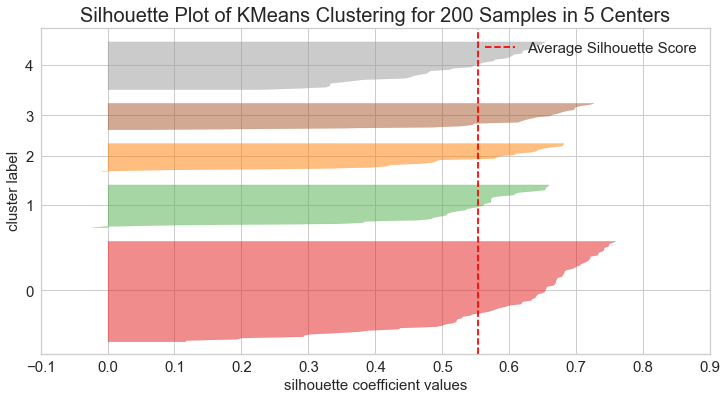

In [429]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();


### *iii. Apply K Means*: Building the model based on the optimal number of clusters

In [546]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

kmeans_model = KMeans(
    n_clusters=5,
    random_state=random_state
)
pipe_kmeans = Pipeline([
    ('OneHotEncoder', column_trans),
    ('kmeans', kmeans_model)
])
pipe_kmeans.fit(X)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [])])),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

### *iv. Visualizing and Labeling All the Clusters*

In [547]:
pipe_kmeans['kmeans'].labels_

array([3, 0, 3, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 3, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 4, 0, 2, 0,
       1, 0, 2, 3, 3, 3, 2, 0, 3, 4, 2, 2, 2, 4, 3, 2, 4, 3, 4, 2, 4, 3,
       2, 4, 3, 3, 4, 2, 4, 4, 4, 3, 2, 3, 3, 2, 2, 3, 4, 2, 3, 2, 2, 3,
       0, 2, 4, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 4, 3, 2, 3, 4, 2, 4, 4,
       4, 3, 3, 3, 3, 3, 4, 2, 2, 2, 3, 3, 0, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       3, 0, 3, 0, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 2, 0, 3, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 3, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 3, 0, 1, 0, 3, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       3, 0])

In [556]:
X["predicted_clusters"] = pipe_kmeans['kmeans'].labels_
X["predicted_clusters"].value_counts()

0    65
3    50
1    38
2    28
4    19
Name: predicted_clusters, dtype: int64

In [557]:
X

,annual_income,spending_score,predicted_clusters
CustomerID,,,
1,15,39,3
2,15,81,0
3,16,6,3
4,16,77,0
5,17,40,3
...,...,...,...
196,120,79,0
197,126,28,1
198,126,74,0


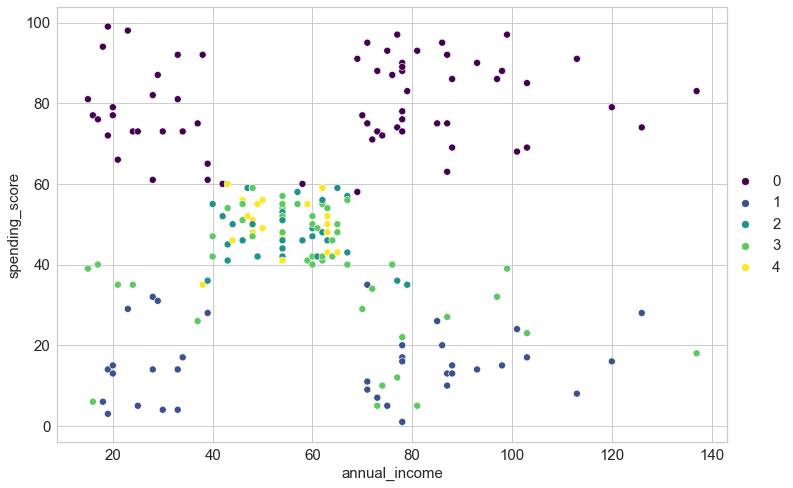

In [568]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=X["annual_income"], y=X["spending_score"], hue= X["predicted_clusters"], palette= "viridis")
centers = kmeans.cluster_centers_
plt.legend(loc="center right", bbox_to_anchor=(1.1,0.5))
plt.show()


### Visualization cluster_centers_

In [559]:
# scaled
centers = pipe_kmeans['kmeans'].cluster_centers_
pd.DataFrame(centers)

,0,1,2
0,-0.614157,1.149715,0.513153
1,0.628336,-1.366519,1.454718
2,0.777131,-0.099272,-0.428412
3,-0.834647,-0.394427,-1.369977
4,1.895585,-0.015937,-0.428412


In [560]:
centers[:,0] # centers of annual_income_k_$ feature

array([-0.61415725,  0.62833625,  0.77713073, -0.8346466 ,  1.89558491])

In [561]:
centers[:,1] # centers of spending_score_1_100 feature

array([ 1.14971545, -1.36651894, -0.09927228, -0.39442706, -0.01593727])

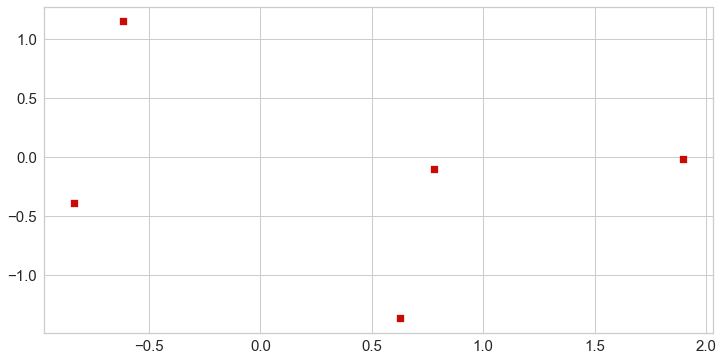

In [563]:
plt.scatter(centers[:,0], centers[:,1], marker='s', c="r", label='Centroids')
plt.show();

In [158]:
clus_pred = X.groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2,3,4
annual_income_k_$,-0.200913,0.991583,-1.307519,-1.329545,1.055003
spending_score_1_100,-0.026456,1.239503,-1.136965,1.132178,-1.284439


In [161]:
X["labels"] = X['predicted_clusters'].map({
    0:"medium_income_medium_spent",
    1:"high_income_low_spent",
    2:"low_income_low_spent",
    3:"low_income_high_spent",
    4:"high_income_high_spent"
})
X

,annual_income_k_$,spending_score_1_100,predicted_clusters,labels
CustomerID,,,,
1,-1.738999,-0.434801,2,low_income_low_spent
2,-1.738999,1.195704,3,low_income_high_spent
3,-1.700830,-1.715913,2,low_income_low_spent
4,-1.700830,1.040418,3,low_income_high_spent
5,-1.662660,-0.395980,2,low_income_low_spent
...,...,...,...,...
196,2.268791,1.118061,1,high_income_low_spent
197,2.497807,-0.861839,4,high_income_high_spent
198,2.497807,0.923953,1,high_income_low_spent


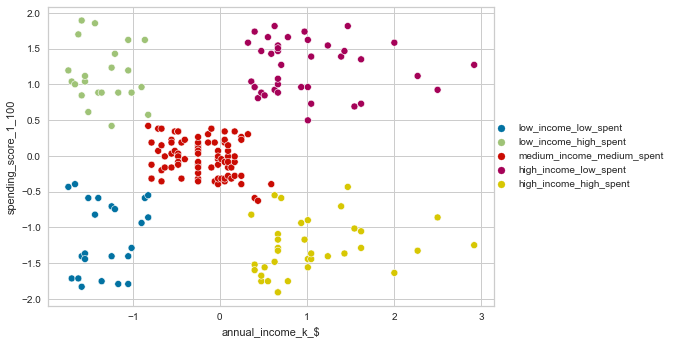

In [162]:
sns.scatterplot(data=X, x="annual_income_k_$", y="spending_score_1_100", hue="labels")
plt.legend(loc="center right", bbox_to_anchor=(1.4,0.5))
plt.show()

# Agglomerative Cluster Analysis (Hierarchical Clustering)

In [449]:
df

,gender,age,annual_income,spending_score
CustomerID,,,,
1,Male,-1.424569,-1.738999,-0.434801
2,Male,-1.281035,-1.738999,1.195704
3,Female,-1.352802,-1.700830,-1.715913
4,Female,-1.137502,-1.700830,1.040418
5,Female,-0.563369,-1.662660,-0.395980
...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061
197,Female,0.441365,2.497807,-0.861839
198,Male,-0.491602,2.497807,0.923953


## Clustering based on Age and Spending Score - x1

In [450]:
X1 = df.iloc[:, [1,3]]
X1

,age,spending_score
CustomerID,,
1,-1.424569,-0.434801
2,-1.281035,1.195704
3,-1.352802,-1.715913
4,-1.137502,1.040418
5,-0.563369,-0.395980
...,...,...
196,-0.276302,1.118061
197,0.441365,-0.861839
198,-0.491602,0.923953


### i. Dendogram - Determine optimal number of clusters

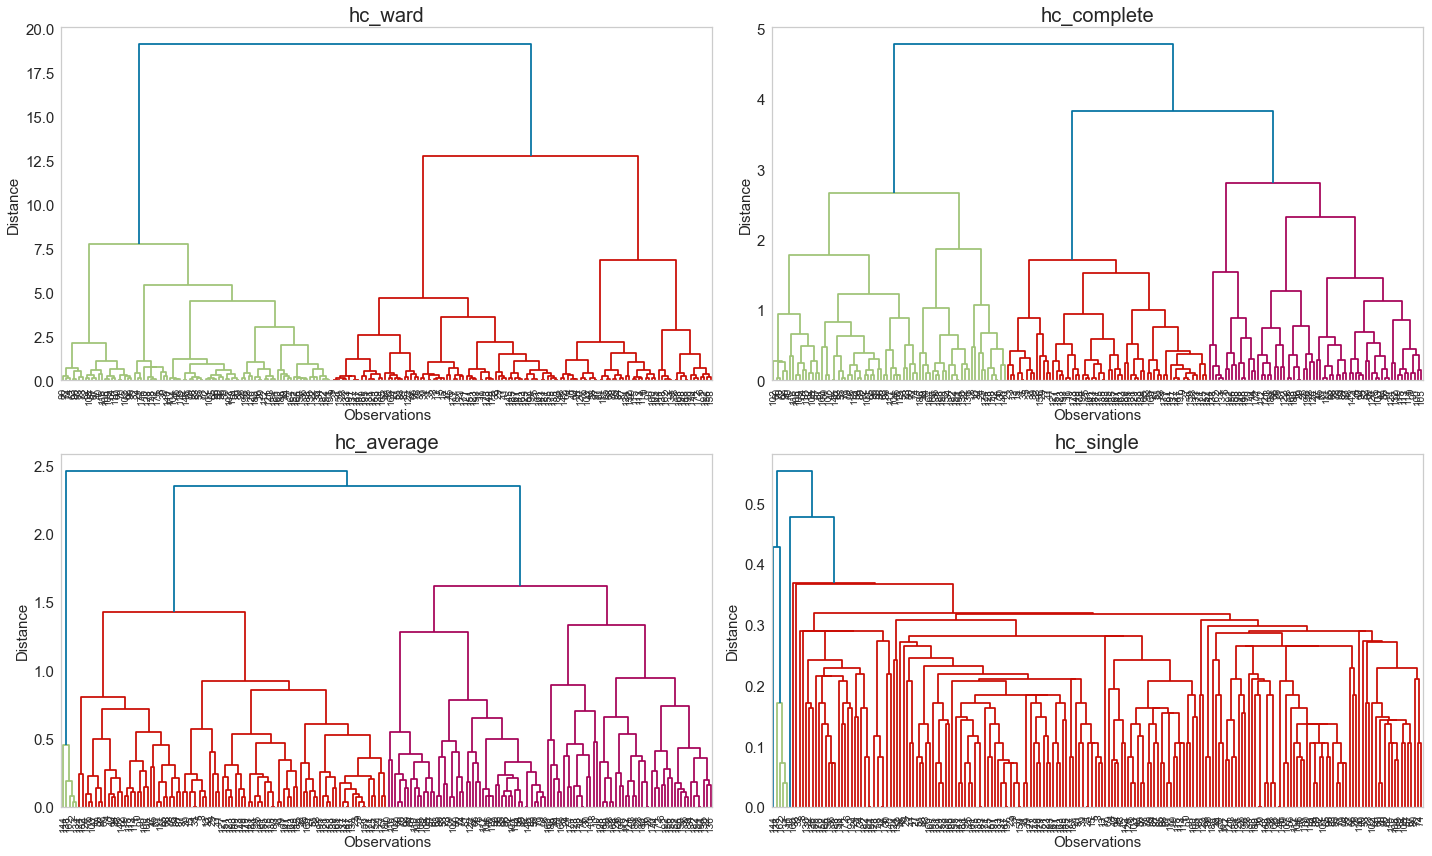

In [451]:
%matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (20,12))

hc_ward     = linkage(y=X1, method="ward")
hc_complete = linkage(X1, "complete") 
hc_average  = linkage(X1, "average")
hc_single   = linkage(X1, "single")

scorelist = ['hc_ward', 'hc_complete', 'hc_average', 'hc_single']

for i, col in enumerate([hc_ward, hc_complete, hc_average, hc_single]):
    plt.subplot(2, 2, i+1)     
    plt.title(f'{scorelist[i]}')
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(col, leaf_font_size=10)
    plt.tight_layout()

In [459]:
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36737734620684265
For n_clusters=3, the silhouette score is 0.462308734038414
For n_clusters=4, the silhouette score is 0.4924899099064366
For n_clusters=5, the silhouette score is 0.5541332798644271
For n_clusters=6, the silhouette score is 0.5390996397382017
For n_clusters=7, the silhouette score is 0.520894822141792
For n_clusters=8, the silhouette score is 0.43313054817610713
For n_clusters=9, the silhouette score is 0.43944465774630276
For n_clusters=10, the silhouette score is 0.4345958236001419


### ii. *Apply Agglomerative Clustering*  Age and Spending Score- x1

In [458]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model.labels_)}')

Silhouette Score for 2 clusters: 0.41449964268735984
Silhouette Score for 3 clusters: 0.41664148520394606
Silhouette Score for 4 clusters: 0.3892700489345869
Silhouette Score for 5 clusters: 0.3764554127950157
Silhouette Score for 6 clusters: 0.3990690566534328
Silhouette Score for 7 clusters: 0.3586046783668453
Silhouette Score for 8 clusters: 0.3610812833213386
Silhouette Score for 9 clusters: 0.365908374973662


## Clustering based on Annual Income and Spending Score - x2

In [460]:
X2 = df.iloc[:, [2,3]]
X2

,annual_income,spending_score
CustomerID,,
1,-1.738999,-0.434801
2,-1.738999,1.195704
3,-1.700830,-1.715913
4,-1.700830,1.040418
5,-1.662660,-0.395980
...,...,...
196,2.268791,1.118061
197,2.497807,-0.861839
198,2.497807,0.923953


### i. Dendogram - Determine optimal number of clusters

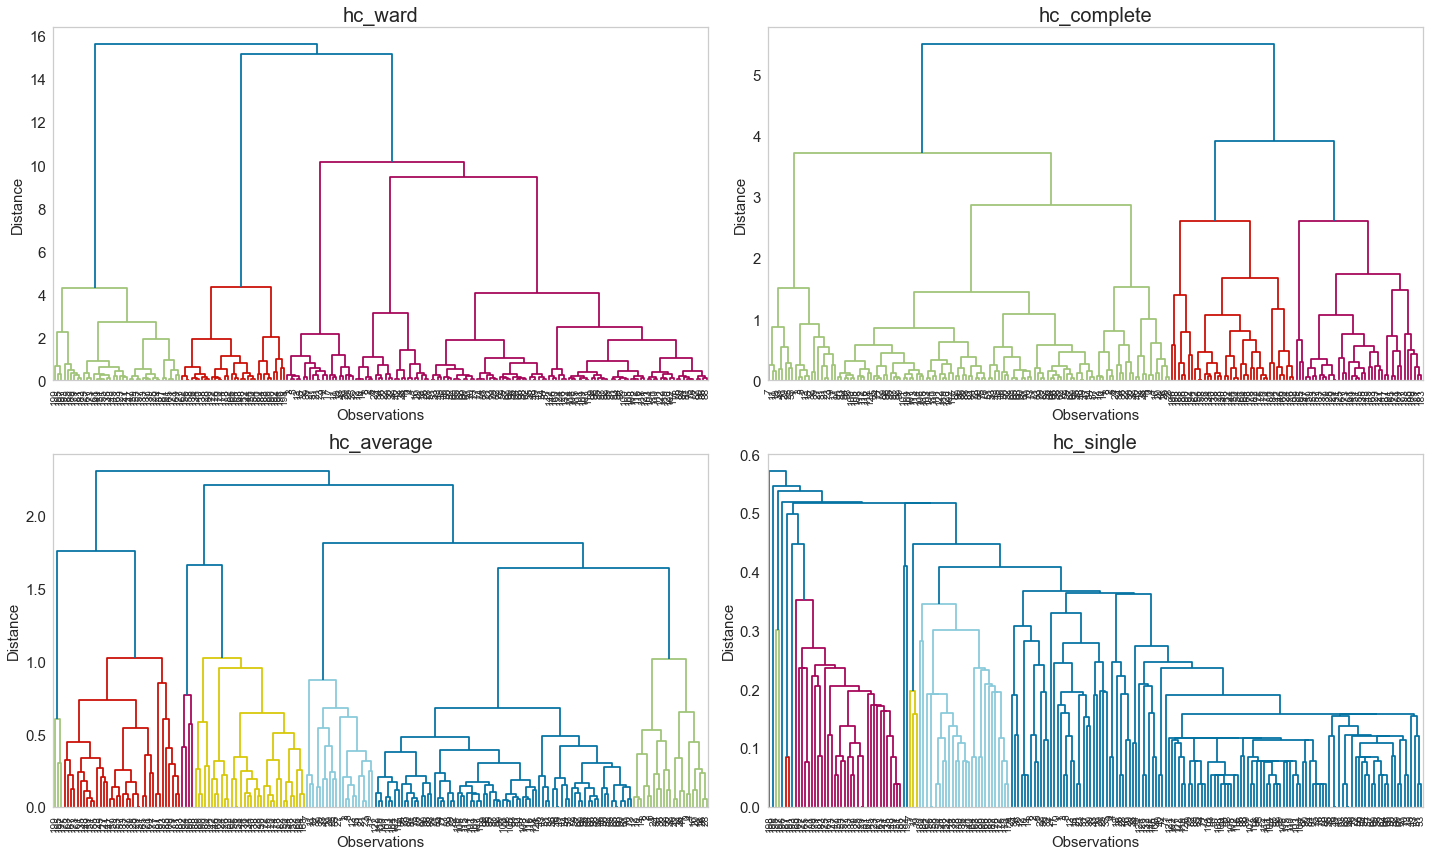

In [461]:
%matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (20,12))

hc_ward     = linkage(y=X2, method="ward")
hc_complete = linkage(X2, "complete") 
hc_average  = linkage(X2, "average")
hc_single   = linkage(X2, "single")

scorelist = ['hc_ward', 'hc_complete', 'hc_average', 'hc_single']

for i, col in enumerate([hc_ward, hc_complete, hc_average, hc_single]):
    plt.subplot(2, 2, i+1)     
    plt.title(f'{scorelist[i]}')
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(col, leaf_font_size=10)
    plt.tight_layout()

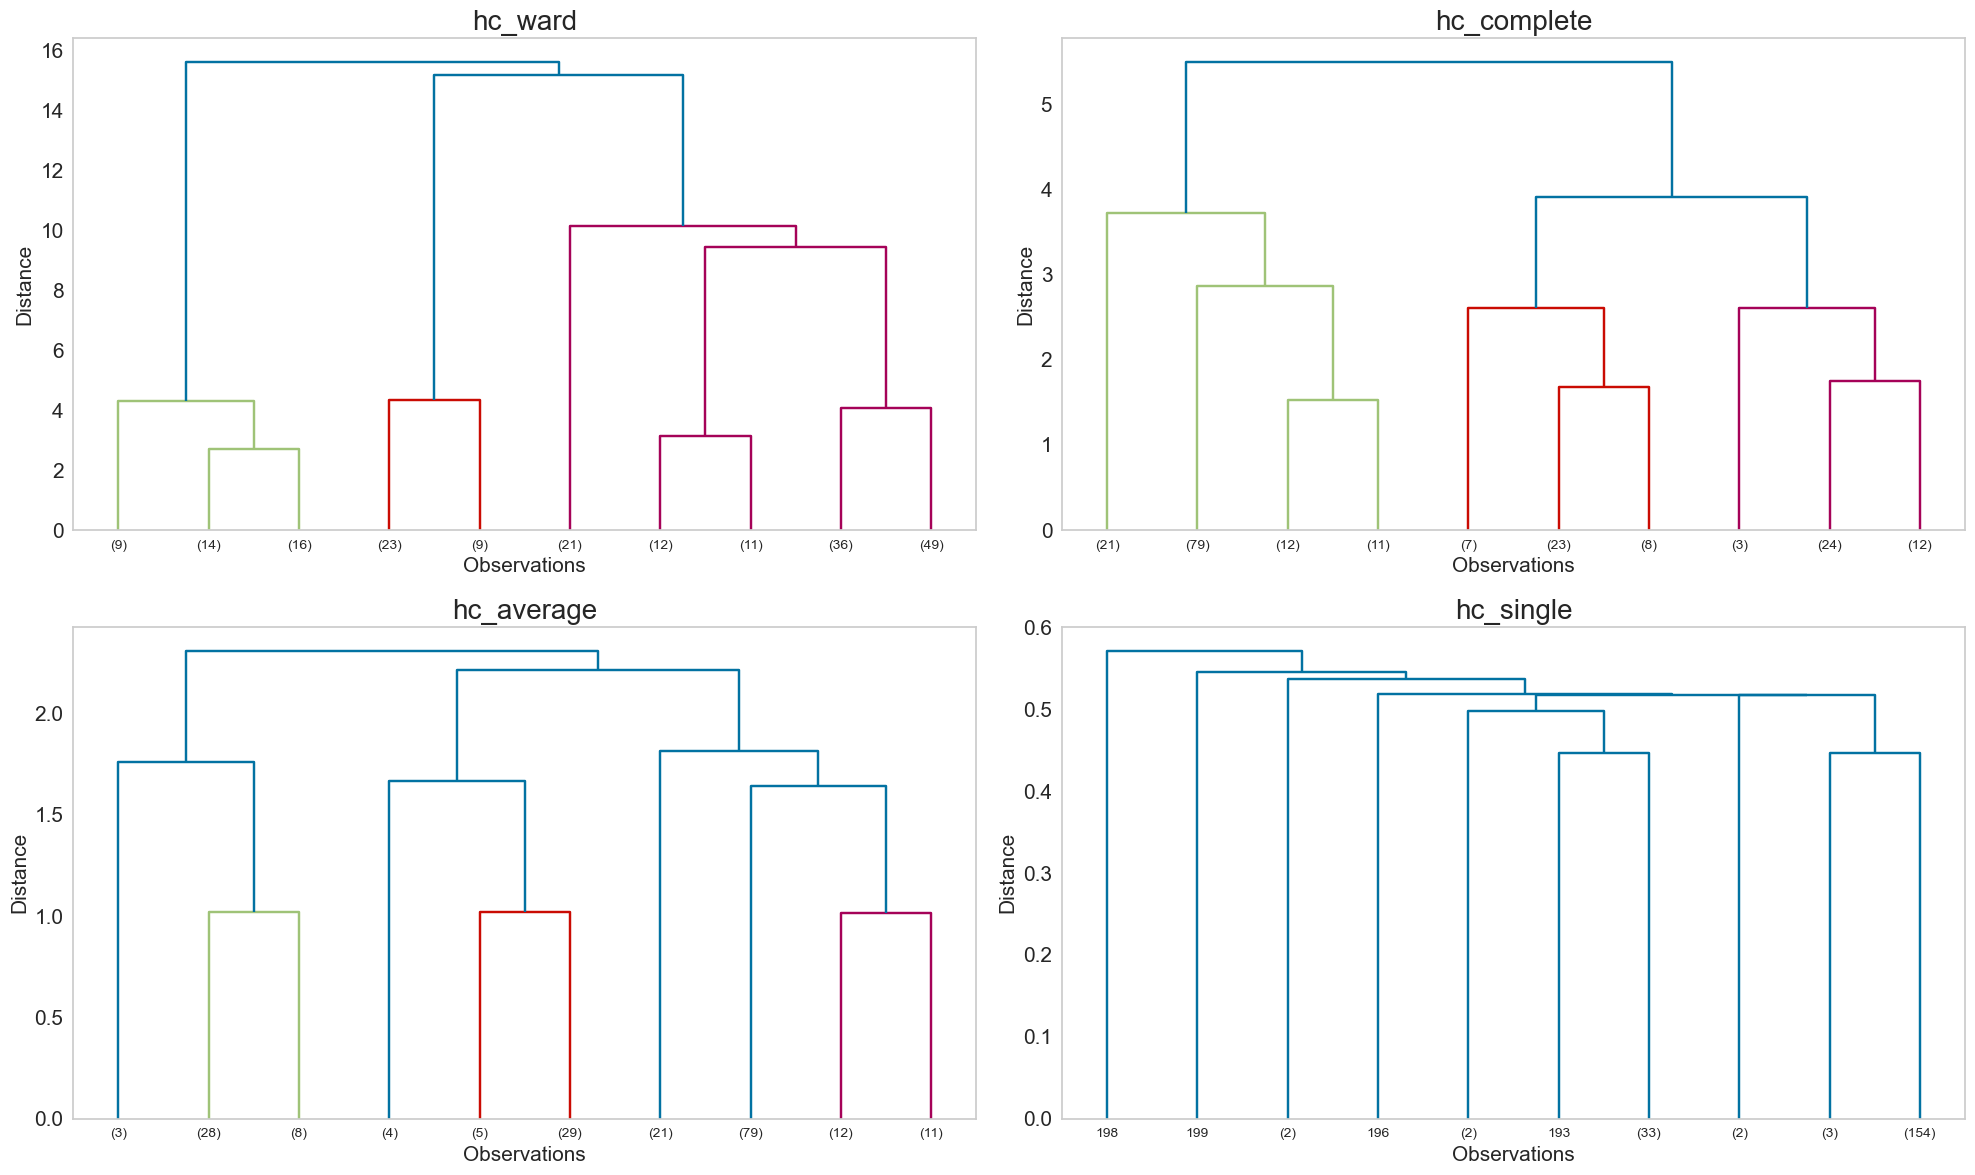

In [175]:
%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (20,12))

for i, col in enumerate([hc_ward, hc_complete, hc_average, hc_single]):
    plt.subplot(2, 2, i+1) 
    plt.title(f'{scorelist[i]}')
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    # truncate_mode='lastp', p=10(10 küme gösterir)
    dendrogram(col, leaf_font_size=10, truncate_mode='lastp', p=10)
    plt.tight_layout()

### ii. *Apply Agglomerative Clustering*  Annual Income and Spending Score - x2

In [462]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.3842337621772661
Silhouette Score for 3 clusters: 0.4610481446570447
Silhouette Score for 4 clusters: 0.4925507715349343
Silhouette Score for 5 clusters: 0.5538089226688662
Silhouette Score for 6 clusters: 0.5386761871036926
Silhouette Score for 7 clusters: 0.5197949293475768
Silhouette Score for 8 clusters: 0.4308617778221774
Silhouette Score for 9 clusters: 0.43768997758154127


## iii. *Visualizing and Labeling All the Clusters* 

### Age and Spending Score- x1

In [463]:
model1 = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
model1.fit(X1)
model1.labels_
X1['labels'] = model1.labels_
X1

,age,spending_score,labels
CustomerID,,,
1,-1.424569,-0.434801,1
2,-1.281035,1.195704,2
3,-1.352802,-1.715913,1
4,-1.137502,1.040418,2
5,-0.563369,-0.395980,1
...,...,...,...
196,-0.276302,1.118061,2
197,0.441365,-0.861839,0
198,-0.491602,0.923953,2


Text(0.5, 1.0, 'Predicted Clusters')

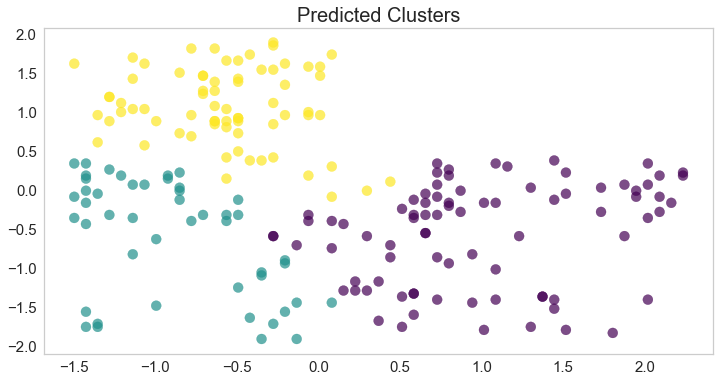

In [466]:
plt.figure(figsize=(12,6))
plt.scatter(X1["age"], X1["spending_score"], c=X1['labels'], cmap="viridis", alpha=0.7, s=100)
plt.title("Predicted Clusters")

### Annual Income and Spending Score- x2

In [468]:
model2 = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
model2.fit(X2)
model2.labels_
X2['labels'] = model2.labels_
X2

,annual_income,spending_score,labels
CustomerID,,,
1,-1.738999,-0.434801,3
2,-1.738999,1.195704,4
3,-1.700830,-1.715913,3
4,-1.700830,1.040418,4
5,-1.662660,-0.395980,3
...,...,...,...
196,2.268791,1.118061,2
197,2.497807,-0.861839,0
198,2.497807,0.923953,2


Text(0.5, 1.0, 'Predicted Clusters')

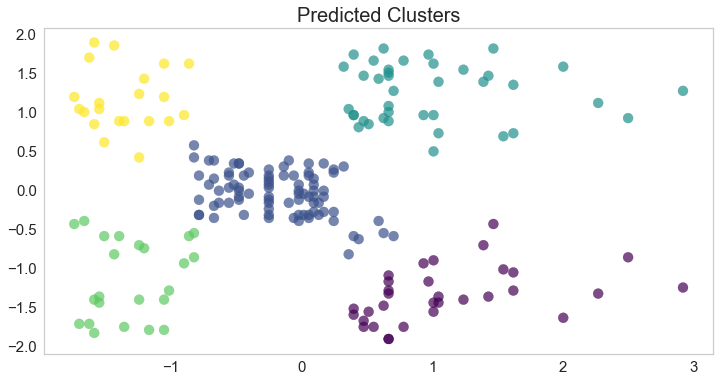

In [470]:
plt.figure(figsize=(12,6))
plt.scatter(X2["annual_income"], X2["spending_score"], c=X2['labels'], cmap="viridis", alpha=0.7, s=100)
plt.title("Predicted Clusters")

## Visualizing Interpretation

### Interpretation based on Age and Spending Score- x1

In [471]:
clus_pred = X1.groupby("labels").mean().T
clus_pred

labels,0,1,2
age,0.985236,-0.894717,-0.567469
spending_score,-0.565298,-0.599174,1.072584


<AxesSubplot:>

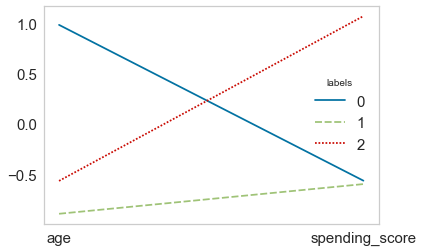

In [472]:
sns.lineplot(data=clus_pred)

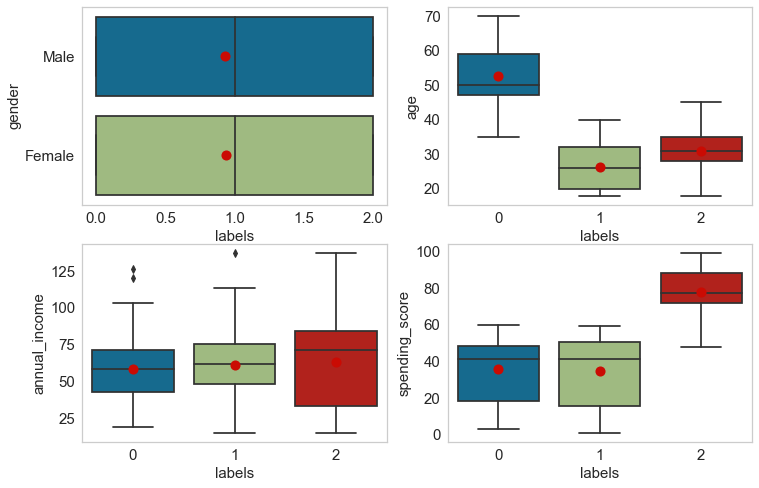

In [473]:
plt.figure(figsize=(12,8))

for i, col in enumerate(df_not_scaled.columns):
    plt.subplot(2, 2, i+1) 
    sns.boxplot(x=X1['labels'], y=col, data=df_not_scaled)

#### Conclusion

**cluster 0** : The average age is around 40, their annual income is average but their spending_score is low. It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, their annual income is high but their spending_score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 65, their annual income is low but their spending_score is average. It can be 
directed to shopping with gift certificates.

### Interpretation based on Annual Income and Spending Score- x2

In [474]:
clus_pred = X2.groupby("labels").mean().T
clus_pred

labels,0,1,2,3,4
annual_income,1.101045,-0.181237,0.991583,-1.307519,-1.353670
spending_score,-1.343469,-0.041562,1.239503,-1.136965,1.158731


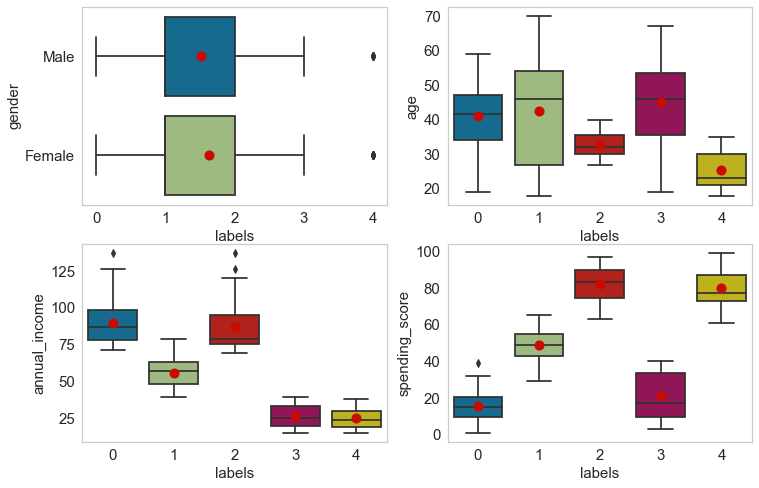

In [477]:
plt.figure(figsize=(12,8))

for i, col in enumerate(df_not_scaled.columns):
    plt.subplot(2, 2, i+1) 
    sns.boxplot(x=X2['labels'], y=col, data=df_not_scaled)

#### Conclusion

**cluster 0** : The average age is around 40, their annual income is very high but their spending_score is very low. This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 1**: The average age is around 45, both annula_income and spending_scores are on average. It should be researched what can be done to direct to more spending.

**cluster 2** :The average age is around 30, both annula_income and spending_scores are on very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it. 

**cluster 3**: The average age is around 50, both annula_income and spending_scores are on very low. It can be directed to shopping with gift certificates.

**cluster 4**: The average age is around 25, their annual income is very low but their spending_score is very high. This 
group does a lot of shopping, but they do not bring much profit.

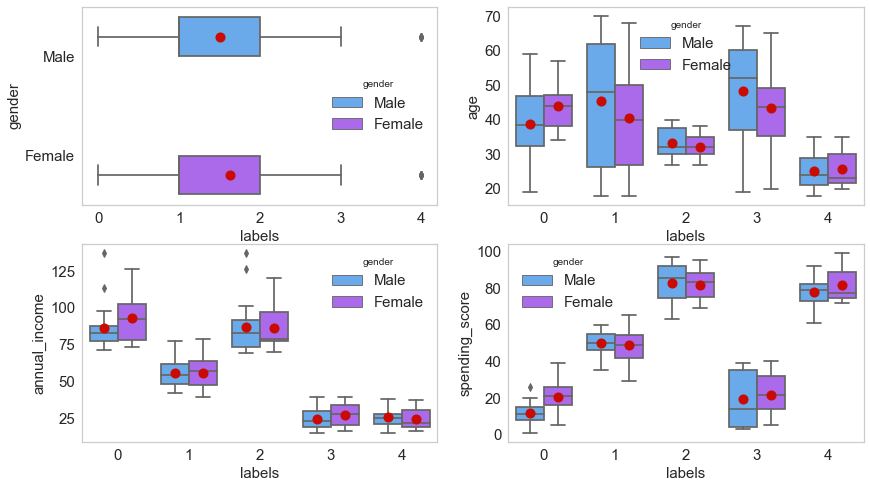

In [481]:
plt.figure(figsize=(14,8))

for i, col in enumerate(df_not_scaled.columns):
    plt.subplot(2, 2, i+1) 
    sns.boxplot(x=X2['labels'], y=col, data=df_not_scaled, hue=df['gender'], palette='cool')

## Conclusion

### Female

**cluster 0** : The average age is around 45, their annual income is very high but their spending_score is very low. This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 1**: The average age is around 40, both annula_income and spending_scores are on average. It should be researched what can be done to direct to more spending.

**cluster 2** :The average age is around 30, both annula_income and spending_scores are on very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it. 

**cluster 3**: The average age is around 45, both annula_income and spending_scores are on very low. It can be directed to shopping with gift certificates.

**cluster 4**: The average age is around 25, their annual income is very low but their spending_score is very high. This 
group does a lot of shopping, but they do not bring much profit.

### Male

**cluster 0** : The average age is around 40, their annual income is very high but their spending_score is very low. This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 1**: The average age is around 45, both annula_income and spending_scores are on average. It should be researched what can be done to direct to more spending.

**cluster 2** :The average age is around 30, both annula_income and spending_scores are on very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it. 

**cluster 3**: The average age is around 50, both annula_income and spending_scores are on very low. It can be directed to shopping with gift certificates.

**cluster 4**: The average age is around 25, their annual income is very low but their spending_score is very high. This 
group does a lot of shopping, but they do not bring much profit.